# Capstone Project - Business Recommendation System
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find the business opportunities in different area is **Islamabad Pakistan** .
Since there are many businesses already running in different areas, we will try to get the list of businesses that anyone can start in any new area. 
*For example* There is any area where there is no **Gym** , so we can recommend about *Gym*. We are getting Information about recommended businesses from other similar areas because new businesses should be similar to surrounding businesses. We can not start all businesses in all areas.

We can not only recommend busineses, but we can also see what type of businesses are lack it different areas.

## Data <a name="data"></a>

According to pour problem, we have decided to get following data:
* All the current venues around the central location. It will includes all 
* Most popular businesses around the central location.
* Rating and users interest/Like in all venues

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim 
import folium

In [213]:
address = 'Ghauri town Islamabad'
address = 'Chandni Chowk Rawalpindi' # latitude = 33.6058  longitude = 73.0437
address = 'Islamabad'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)

print(location)
location_name = address
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} City are {}, {}.'.format(address,latitude, longitude))

اسلام آباد, وفاقی دارالحکومت اسلام آباد, 44000, پاکستان
The geograpical coordinate of Islamabad City are 33.6938118, 73.0651511.


In [2]:
CLIENT_ID = '' 
CLIENT_SECRET = '' 
VERSION = '20180605' 
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DALRYGD3YYDWGCNBT5SV2T2GAWAH4QOAJQIZ4NXAXH12KVEI
CLIENT_SECRET:34ZVMV0NBGOL2NE1LHVJXQB3O5U3R34SYQZ3PKZ5L1QT5XWP


In [3]:
def getVenueSearch(location_name,latitude,longitude,LIMIT=10):
    venues_list=[]
#&categoryId=4d4b7105d754a06374d81259
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, 
            latitude, longitude, LIMIT)
            
    results = requests.get(url).json()["response"]['venues']
        
    venues_list.append([(
        v['id'], v['name'], 
        v['location']['distance'],
        v['location']['lat'], 
        v['location']['lng'], 
        v['categories'][0]['name'] if len(v['categories']) >= 1 else 'Not Availble') for v in results])
    
    venue_df = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venue_df.columns = ["venue_id","venue_name", "venue_distance_from_location", 
                        "venue_latitude", "venue_longitude", "category"]
    return venue_df
    

In [147]:
def getVenueRecommendations(location_name,latitude,longitude,OFFSET=1,LIMIT=10):
    
    venues_list=[]

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&offset={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, 
            latitude, longitude, OFFSET)
    
    print(url)
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
    venues_list.append([(
        v['venue']['id'], 
        v['venue']['name'], 
        v['venue']['location']['distance'],
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],
        v['venue']['categories'][0]['name'] if len(v['venue']['categories']) >= 1 else 'Not Availble') for v in results])
    
    venue_df = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venue_df.columns = ["venue_id","venue_name", "venue_distance_from_location", 
                        "venue_latitude", "venue_longitude", "category"]
    return venue_df
    

In [128]:
def getVenueRating(venue_id):
    
    venues_list=[]

    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
            venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
            
    json = requests.get(url).json()
    
    venue = json["response"]['venue']
    
    return venue['rating'] if not(venue.get('rating') is None) else -1  , venue['likes']['count']

In [284]:
def getVenueTrending(location_name,latitude,longitude,LIMIT=10):
    
    venues_list=[]

    url = 'https://api.foursquare.com/v2/venues/trending?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION,
            latitude, longitude, LIMIT)
    json = requests.get(url).json()    
    #print(json)    
    results = json["response"]['venues']
        
    venues_list.append([(
        v['id'],
        v['name'], 
        v['location']['distance'],
        v['location']['lat'], 
        v['location']['lng'],
        v['categories'][0]['name'] if len(v['categories']) >= 1 else 'Not Availble') for v in results])
    
    venue_df = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    if(len(venue_df.columns) > 1):
        venue_df.columns = ["venue_id","venue_name", "venue_distance_from_location", 
                            "venue_latitude", "venue_longitude", "category"]
    return venue_df

#[x if x is not None else 99 for x in (1,2,3,None,5) ]
#df = pd.json_normalize(results)
#pd.set_option('display.max_colwidth', None)
#df[['name','categories']].head(30)

In [261]:
location_name, latitude, longitude = "PWD Islamabad", 33.57528, 73.13797

In [47]:
location_name, latitude, longitude = "Islamabad", 33.6938118, 73.0651511

In [263]:
recommendated_venues = getVenueRecommendations(location_name, latitude, longitude, LIMIT=50)
search_venues = getVenueSearch(location_name, latitude, longitude, LIMIT=50)

In [154]:
df[df['venue_name']=='Shinwari']

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category
4,4f8c2c80e4b01f95a5663e5d,Shinwari,2292,33.685101,73.042721,BBQ Joint
3,4f8c2c80e4b01f95a5663e5d,Shinwari,2292,33.685101,73.042721,BBQ Joint


In [148]:
df = getVenueRecommendations(location_name, latitude, longitude, 1, LIMIT=50)
df.shape

df_new = getVenueRecommendations(location_name, latitude, longitude, 2, LIMIT=50)

df = pd.concat([df,df_new])

df.shape

https://api.foursquare.com/v2/venues/explore?&client_id=DALRYGD3YYDWGCNBT5SV2T2GAWAH4QOAJQIZ4NXAXH12KVEI&client_secret=34ZVMV0NBGOL2NE1LHVJXQB3O5U3R34SYQZ3PKZ5L1QT5XWP&v=20180605&ll=33.6938118,73.0651511&offset=1
https://api.foursquare.com/v2/venues/explore?&client_id=DALRYGD3YYDWGCNBT5SV2T2GAWAH4QOAJQIZ4NXAXH12KVEI&client_secret=34ZVMV0NBGOL2NE1LHVJXQB3O5U3R34SYQZ3PKZ5L1QT5XWP&v=20180605&ll=33.6938118,73.0651511&offset=2


(60, 6)

In [256]:
getVenueTrending(location_name, latitude, longitude, LIMIT=50)

{'meta': {'code': 200, 'requestId': '606e1a3d691dfe5a3e8e888f'}, 'response': {'venues': []}}


""


In [264]:
recommendated_venues.head(10)

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category
0,4ce4ca36e571a0934cd18687,Pakistan Monument,357,33.693070,73.068910,History Museum
1,4c724d058efc37040e85127d,Lok Virsa Museum,873,33.688942,73.072550,History Museum
2,516ee451e4b0486f6ff1fc92,Doka Mocca,1467,33.698124,73.050180,Snack Place
3,4f1e9850e4b01e4d5776de76,Shakarparian,900,33.693253,73.074847,National Park
4,4ba76c28f964a520a49239e3,Tehzeeb Bakers,2422,33.715444,73.067963,Bakery
5,4f8c2c80e4b01f95a5663e5d,Shinwari,2292,33.685101,73.042721,BBQ Joint
6,4c6026ed1e5cd13a6a02a1ed,D. Watson,1906,33.708857,73.055319,Pharmacy
7,4f802bace4b04cf78880fad7,The Centaurus,2115,33.707791,73.049679,Shopping Mall
8,51b962c7498e1ba21d4ff958,Burning Brownie Cafe & Bake Shop,3081,33.720508,73.073956,Coffee Shop
9,4f65704ee4b041039ea3614f,Roasters Coffee House & Grill,2976,33.719233,73.055178,Burger Joint


In [265]:
search_venues.head(10)

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category
0,4ce4ca36e571a0934cd18687,Pakistan Monument,357,33.693070,73.068910,History Museum
1,4d400cc6915a3704e020117f,One Shop,4014,33.729115,73.074022,Toy / Game Store
2,5152cd43e4b0563567a7c8c4,Police Challan Return Point,144,33.695101,73.065347,Police Station
3,4bb1e929f964a5200caa3ce3,F-7 Food Court,1035,33.696328,73.054383,Not Availble
4,4d9adde003d8721e2649da24,traffic police ka khufya office,294,33.695957,73.063286,Police Station
5,4ec8b5ff29c22cc60ddefb71,Sitara Market G-7,1191,33.703999,73.069082,Miscellaneous Shop
6,4d4b9b94d28f3704275cf522,ZTBL,698,33.698845,73.060649,Capitol Building
7,4e1323648877ac23b66fabc0,Associated press of Pakistan,266,33.696105,73.065964,Not Availble
8,4e85e35193ad89808cf79dc5,Workshops Market,692,33.699593,73.067901,Not Availble
9,4e7c9eb129c26d74e3110d5f,Kurang Petrol Pump,1293,33.684038,73.072714,Not Availble


In [267]:
df = pd.concat([recommendated_venues,search_venues])

In [275]:
df.reset_index(inplace=True)

In [278]:
df = df.drop('index',1)

In [279]:
df

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category
0,4ce4ca36e571a0934cd18687,Pakistan Monument,357,33.693070,73.068910,History Museum
1,4c724d058efc37040e85127d,Lok Virsa Museum,873,33.688942,73.072550,History Museum
2,516ee451e4b0486f6ff1fc92,Doka Mocca,1467,33.698124,73.050180,Snack Place
3,4f1e9850e4b01e4d5776de76,Shakarparian,900,33.693253,73.074847,National Park
4,4ba76c28f964a520a49239e3,Tehzeeb Bakers,2422,33.715444,73.067963,Bakery
...,...,...,...,...,...,...
95,4fa13ffae4b0f8dae1893f3c,Alvi Auctioneers,1373,33.702897,73.075181,Furniture / Home Store
96,4e30ef24887784ec62644712,Pakistan Battery House,901,33.691459,73.055842,Miscellaneous Shop
97,5fa6a5da8567ce5f92cd94c7,Lok Virsa,921,33.688470,73.072754,Cultural Center
98,4f6050f3e4b05c3a927a3143,Zia Balti & BBQ,668,33.699805,73.064684,BBQ Joint


venue_df = df.copy()

for index, row in df.iterrows():
    category = row['category']
    venue_df.at[index, category] = 1

venue_df = venue_df.fillna(0)
venue_df.head(7)

In [131]:
import math
count =0 
for index, row in df.iterrows():
    if(math.isnan(row['venue_rate'])):
        print(row['venue_id'], row['venue_name'], row['venue_rate'])
        df.at[index,'venue_rate'], df.at[index,'venue_likes'] = getVenueRating(row['venue_id'])
    count +=1
    if(count ==100): 
        break
#df[:40]

4c590d8c2091a5932a185cd0 National Book Foundation nan
56d48de4cd1031ad7cf566e8 Localads.pk nan
4ceaa893e1eeb60c096dafae PIMS Emergency nan
4ee19d777ee50b21c6247914 Sariya Chowk nan
5ad5bbc7d7627e698888aafe Strengthening Participatory Organization (SPO) nan
55767645498ea8f0c88694e7 Meezan Bank nan
5108c9d1e4b028437c7d25ad Capital Development Authority nan
5ab10d466e46507aaebee16e Yogi Haus nan
4f656a39e4b0788a90339519 G-7 Markaz nan
4c7dd1913b22a1cd1b3f609e PAKISTAN POST nan
55ee8863498e4b104ee8174e Directorate of Municipal Administration (DMA) nan
4c6146981e5cd13a7390a3ed Owais Enterprises nan
57f1ec89498efc88482e9142 Islamabad Diagnostic Centre nan
4d4d2a7c13d88cfaa88c05da Capital Car Wash 381 nan
5665a018498e4820f476e918 Daewoo Cargo nan
4fa13ffae4b0f8dae1893f3c Alvi Auctioneers nan
4e30ef24887784ec62644712 Pakistan Battery House nan


KeyError: 'venue'

In [130]:
df.to_csv('business_data.csv',index=False)

In [110]:
df = pd.read_csv('business_data.csv')
df

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category,venue_rate,venue_likes
0,4ce4ca36e571a0934cd18687,Pakistan Monument,357,33.693070,73.068910,History Museum,8.3,53.0
1,4c724d058efc37040e85127d,Lok Virsa Museum,873,33.688942,73.072550,History Museum,8.6,36.0
2,516ee451e4b0486f6ff1fc92,Doka Mocca,1467,33.698124,73.050180,Snack Place,8.1,27.0
3,4f1e9850e4b01e4d5776de76,Shakarparian,900,33.693253,73.074847,National Park,7.7,12.0
4,4ba76c28f964a520a49239e3,Tehzeeb Bakers,2422,33.715444,73.067963,Bakery,8.4,160.0
...,...,...,...,...,...,...,...,...
95,4fa13ffae4b0f8dae1893f3c,Alvi Auctioneers,1373,33.702897,73.075181,Furniture / Home Store,NaN,NaN
96,4e30ef24887784ec62644712,Pakistan Battery House,901,33.691459,73.055842,Miscellaneous Shop,NaN,NaN
97,5fa6a5da8567ce5f92cd94c7,Lok Virsa,921,33.688470,73.072754,Cultural Center,NaN,NaN
98,4f6050f3e4b05c3a927a3143,Zia Balti & BBQ,668,33.699805,73.064684,BBQ Joint,NaN,NaN


## Methodology <a name="methodology"></a>

In this project we have tried **TWO** methods to find out what we are looking for businesses.
* First of all we gather data from FourSquare API.
* The we tried Recommendation System metholdlogy
* Later we used K-Mean clustering and then compare the different clusters

## Analysis <a name="analysis"></a>

Here is the anaysis of some venues around the central location. This is very **useful** to understand what other businesses are around. The **Rating** and **Likes** like show us the interest of uses in that businesses.

In [20]:
df = df.drop('Unnamed: 0',1).drop('Unnamed: 0.1',1).drop('Unnamed: 0.1.1',1)

In [223]:
_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for name, lat, lng, distance in zip(df['venue_name'], df['venue_latitude'], df['venue_longitude'], df['venue_distance_from_location']):
    label = '{} {}m'.format(name,distance)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(_map)  
    
_map

In [311]:
df['category'].unique()

array(['History Museum', 'Snack Place', 'National Park', 'Bakery',
       'BBQ Joint', 'Pharmacy', 'Shopping Mall', 'Coffee Shop',
       'Burger Joint', 'Sandwich Place', 'Market', 'Department Store',
       'Pizza Place', 'Pakistani Restaurant',
       'Theme Park Ride / Attraction', 'Chinese Restaurant',
       'Golf Course', 'Bookstore', 'Afghan Restaurant', 'Tea Room',
       'Café', 'Restaurant', 'Ice Cream Shop', 'Park', 'Hotel',
       'Italian Restaurant', 'Stadium', 'Gift Shop', 'Gym', 'Donut Shop',
       'Fast Food Restaurant', 'Toy / Game Store', 'Police Station',
       'Not Availble', 'Miscellaneous Shop', 'Capitol Building',
       'Cemetery', 'Gym / Fitness Center', 'Car Wash', 'Office', 'Bank',
       'General Travel', 'Sculpture Garden', "Doctor's Office",
       'Auto Workshop', 'Hardware Store', 'Advertising Agency',
       'Hospital', 'Rest Area', 'Government Building', 'Post Office',
       'Town Hall', 'Medical Center', 'Automotive Shop',
       'Furniture / Hom

In [319]:
df

,Unnamed: 0,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category,venue_rate,venue_likes
0,0,4ce4ca36e571a0934cd18687,Pakistan Monument,357,33.693070,73.068910,History Museum,8.3,53.0
1,1,4c724d058efc37040e85127d,Lok Virsa Museum,873,33.688942,73.072550,History Museum,8.6,36.0
2,2,516ee451e4b0486f6ff1fc92,Doka Mocca,1467,33.698124,73.050180,Snack Place,8.1,27.0
3,3,4f1e9850e4b01e4d5776de76,Shakarparian,900,33.693253,73.074847,National Park,7.7,12.0
4,4,4ba76c28f964a520a49239e3,Tehzeeb Bakers,2422,33.715444,73.067963,Bakery,8.4,160.0
...,...,...,...,...,...,...,...,...,...
94,94,5665a018498e4820f476e918,Daewoo Cargo,798,33.691841,73.056862,Post Office,NaN,NaN
95,95,4fa13ffae4b0f8dae1893f3c,Alvi Auctioneers,1373,33.702897,73.075181,Furniture / Home Store,NaN,NaN
96,96,4e30ef24887784ec62644712,Pakistan Battery House,901,33.691459,73.055842,Miscellaneous Shop,NaN,NaN
97,97,5fa6a5da8567ce5f92cd94c7,Lok Virsa,921,33.688470,73.072754,Cultural Center,NaN,NaN


In [312]:
df.loc[df['category'].str.contains('Restaurant'), 'category'] = 'Restaurant'

### Delete all the Rows , in which category customer is not willing 

In [313]:
df = df.drop(df[df['category']=='Not Availble'].index)

In [314]:

df = df.drop(df[df['category']=='Government Building'].index)

df = df.drop(df[df['category']=='Butcher'].index)
df = df.drop(df[df['category']=='Car Wash'].index)

df = df.drop(df[df['category']=='Plaza'].index)

df = df.drop(df[df['category']=='Mosque'].index)


df = df.drop(df[df['category']=='Market'].index)



In [316]:
venue_df = df.copy()

for index, row in df.iterrows():
    category = row['category']
    venue_df.at[index, category] = 1

venue_df = venue_df.fillna(0)
venue_df.head(7)

,Unnamed: 0,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category,venue_rate,venue_likes,History Museum,...,Hardware Store,Advertising Agency,Hospital,Rest Area,Post Office,Town Hall,Medical Center,Automotive Shop,Furniture / Home Store,Cultural Center
0,0,4ce4ca36e571a0934cd18687,Pakistan Monument,357,33.693070,73.068910,History Museum,8.3,53.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4c724d058efc37040e85127d,Lok Virsa Museum,873,33.688942,73.072550,History Museum,8.6,36.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,516ee451e4b0486f6ff1fc92,Doka Mocca,1467,33.698124,73.050180,Snack Place,8.1,27.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4f1e9850e4b01e4d5776de76,Shakarparian,900,33.693253,73.074847,National Park,7.7,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4ba76c28f964a520a49239e3,Tehzeeb Bakers,2422,33.715444,73.067963,Bakery,8.4,160.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,4f8c2c80e4b01f95a5663e5d,Shinwari,2292,33.685101,73.042721,BBQ Joint,8.3,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,4c6026ed1e5cd13a6a02a1ed,D. Watson,1906,33.708857,73.055319,Pharmacy,7.9,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [318]:
venue_df

,Unnamed: 0,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category,venue_rate,venue_likes,History Museum,...,Hardware Store,Advertising Agency,Hospital,Rest Area,Post Office,Town Hall,Medical Center,Automotive Shop,Furniture / Home Store,Cultural Center
0,0,4ce4ca36e571a0934cd18687,Pakistan Monument,357,33.693070,73.068910,History Museum,8.3,53.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4c724d058efc37040e85127d,Lok Virsa Museum,873,33.688942,73.072550,History Museum,8.6,36.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,516ee451e4b0486f6ff1fc92,Doka Mocca,1467,33.698124,73.050180,Snack Place,8.1,27.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4f1e9850e4b01e4d5776de76,Shakarparian,900,33.693253,73.074847,National Park,7.7,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4ba76c28f964a520a49239e3,Tehzeeb Bakers,2422,33.715444,73.067963,Bakery,8.4,160.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,5665a018498e4820f476e918,Daewoo Cargo,798,33.691841,73.056862,Post Office,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
95,95,4fa13ffae4b0f8dae1893f3c,Alvi Auctioneers,1373,33.702897,73.075181,Furniture / Home Store,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
96,96,4e30ef24887784ec62644712,Pakistan Battery House,901,33.691459,73.055842,Miscellaneous Shop,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,97,5fa6a5da8567ce5f92cd94c7,Lok Virsa,921,33.688470,73.072754,Cultural Center,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [317]:
userChoice = [
            {'venue_type':'Restaurant', 'venue_rate':4},
            {'venue_type':'Bakery', 'venue_rate':2},
            {'venue_type':'Pharmacy', 'venue_rate':3},
            {'venue_type':"Store", 'venue_rate':4}
         ] 
userChoice = pd.DataFrame(userChoice)
userChoice

,venue_type,venue_rate
0,Restaurant,4
1,Bakery,2
2,Pharmacy,3
3,Store,4


In [321]:
venue_df = venue_df.drop('Unnamed: 0',1).drop('venue_id',1).drop('venue_name',1).drop('venue_distance_from_location',1).drop('venue_latitude',1).drop('venue_longitude',1).drop('category',1)

In [328]:
venue_df = venue_df.drop('venue_likes',1).drop('venue_rate',1)

In [349]:
final = pd.DataFrame([], columns=["index",0])
final

,index,0


In [350]:
 venue_df.shape

(85, 47)

In [351]:
for n in range(0,8,4):
    #print(n)
    nextFour = venue_df[n:n+4]
    nextFour.reset_index(inplace=True)
    nextFour.drop('index',1,inplace=True)
    print(nextFour)
    results = nextFour.transpose().dot(userChoice['venue_rate'])
    
    ddf = results.to_frame().reset_index()
    final = final.append(ddf[ddf[0]!=0])
    

   History Museum  Snack Place  National Park  Bakery  BBQ Joint  Pharmacy  \
0             1.0          0.0            0.0     0.0        0.0       0.0   
1             1.0          0.0            0.0     0.0        0.0       0.0   
2             0.0          1.0            0.0     0.0        0.0       0.0   
3             0.0          0.0            1.0     0.0        0.0       0.0   

   Shopping Mall  Coffee Shop  Burger Joint  Sandwich Place  ...  \
0            0.0          0.0           0.0             0.0  ...   
1            0.0          0.0           0.0             0.0  ...   
2            0.0          0.0           0.0             0.0  ...   
3            0.0          0.0           0.0             0.0  ...   

   Hardware Store  Advertising Agency  Hospital  Rest Area  Post Office  \
0             0.0                 0.0       0.0        0.0          0.0   
1             0.0                 0.0       0.0        0.0          0.0   
2             0.0                 0.0      

/Users/ayyaz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/ayyaz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [348]:
final.columns=['business','value']
final

,business,value
0,History Museum,6.0
1,Snack Place,3.0
2,National Park,4.0
3,Bakery,4.0
4,BBQ Joint,2.0
5,Pharmacy,3.0
6,Shopping Mall,4.0


In [341]:

final = final.groupby(['business'], sort=True).sum().reset_index()
final = final.sort_values(by = ['value'], ascending=[False])
final


,business,value
2,History Museum,6.0
1,Bakery,4.0
3,National Park,4.0
5,Shopping Mall,4.0
4,Pharmacy,3.0
6,Snack Place,3.0
0,BBQ Joint,2.0


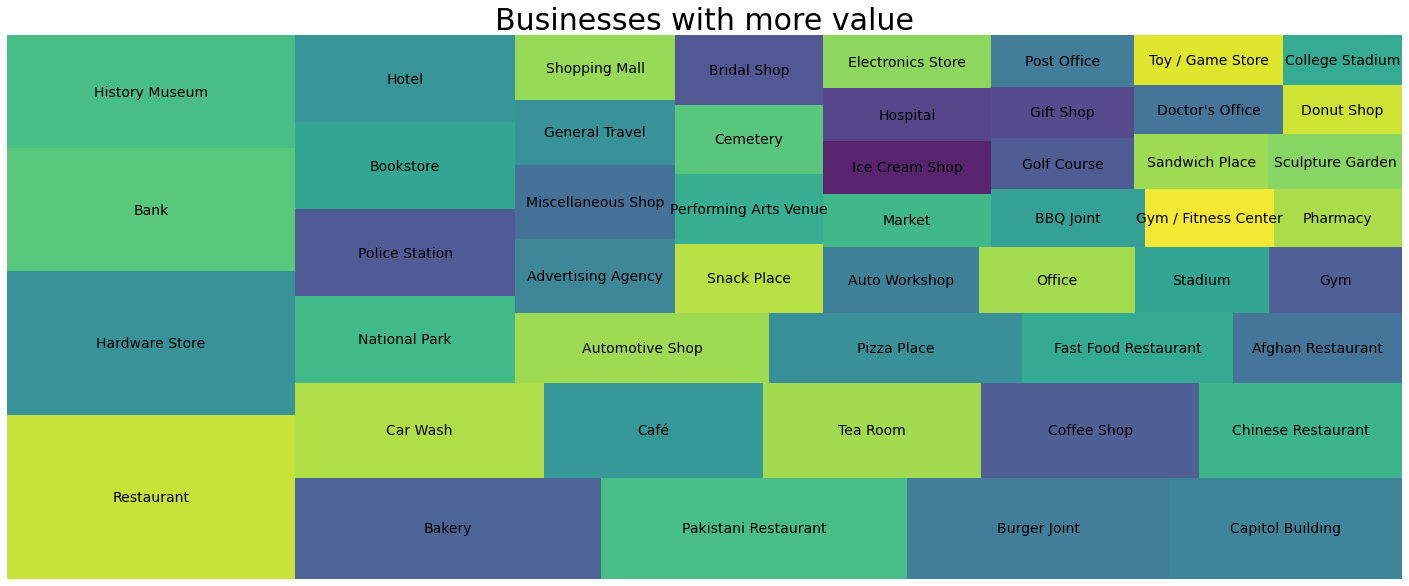

In [242]:
import squarify
import matplotlib.pyplot as plt

plt.figure(figsize = (25, 10))
squarify.plot(sizes = final['value'], alpha = 0.9,
              label = final['business'], text_kwargs={'fontsize':14})

plt.title('Businesses with more value', fontsize = 30)
plt.axis('off')
plt.show()

### K Mean cluster

In [36]:
df = pd.read_csv('business_data.csv')
X = df.drop('venue_id',1).drop('venue_latitude',1).drop('venue_longitude',1)
X

,venue_name,venue_distance_from_location,category,venue_rate,venue_likes
0,Pakistan Monument,357,History Museum,8.3,53.0
1,Lok Virsa Museum,873,History Museum,8.6,36.0
2,Doka Mocca,1467,Snack Place,8.1,27.0
3,Shakarparian,900,National Park,7.7,12.0
4,Tehzeeb Bakers,2422,Bakery,8.4,160.0
...,...,...,...,...,...
95,Alvi Auctioneers,1373,Furniture / Home Store,NaN,NaN
96,Pakistan Battery House,901,Miscellaneous Shop,NaN,NaN
97,Lok Virsa,921,Cultural Center,NaN,NaN
98,Zia Balti & BBQ,668,BBQ Joint,NaN,NaN


In [37]:
X = pd.get_dummies(X)

In [38]:
from sklearn.preprocessing import StandardScaler

X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)
X

array([[-1.24740696,  1.1426681 ,  0.61143841, ..., -0.10050378,
        -0.10050378, -0.10050378],
       [-0.81859342,  1.2207192 ,  0.26782013, ..., -0.10050378,
        -0.10050378, -0.10050378],
       [-0.32495922,  1.09063404,  0.08590457, ..., -0.10050378,
        -0.10050378, -0.10050378],
       ...,
       [-0.77870379, -1.01674566, -0.45984211, ..., -0.10050378,
        -0.10050378, -0.10050378],
       [-0.98895539, -1.01674566, -0.45984211, ..., -0.10050378,
        -0.10050378, -0.10050378],
       [-0.52025221, -1.01674566, -0.45984211, ..., -0.10050378,
        -0.10050378, -0.10050378]])

In [39]:
from sklearn.cluster import KMeans

kclusters = 5

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)

kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [42]:
df = pd.read_csv('business_data.csv')
df['label'] = kmeans.labels_

In [45]:
df.groupby('label').count()

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category,venue_rate,venue_likes
label,,,,,,,,
0,1,1,1,1,1,1,1,1
1,21,21,21,21,21,21,20,20
2,30,30,30,30,30,30,30,30
3,2,2,2,2,2,2,0,0
4,46,46,46,46,46,46,0,0


In [58]:
_map = folium.Map(location=[latitude, longitude], zoom_start=10)

colors = ['blue','red','green','yellow','purple']
for _label, name, lat, lng, distance in zip(df['label'], df['venue_name'], df['venue_latitude'], df['venue_longitude'], df['venue_distance_from_location']):
    label = '{}...{} {}m'.format(_label, name,distance)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors[_label],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(_map)  
    
_map

In [50]:
df[df['label']==0]

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category,venue_rate,venue_likes,label
12,51827e36498eb8bf448d1170,Al Fatah,2072,33.708104,73.050814,Department Store,7.5,10.0,0


In [53]:
df[df['label']==1]['category'].unique()

array(['Coffee Shop', 'Burger Joint', 'Market', 'Golf Course',
       'Bookstore', 'Afghan Restaurant', 'Tea Room', 'Park', 'Hotel',
       'Italian Restaurant', 'Gift Shop', 'Café', 'Pizza Place', 'Gym',
       'Toy / Game Store'], dtype=object)

In [54]:
df[df['label']==2]['category'].unique()

array(['History Museum', 'Snack Place', 'National Park', 'Bakery',
       'BBQ Joint', 'Pharmacy', 'Shopping Mall', 'Sandwich Place',
       'Pizza Place', 'Pakistani Restaurant',
       'Theme Park Ride / Attraction', 'Chinese Restaurant', 'Café',
       'Restaurant', 'Ice Cream Shop', 'Stadium', 'Donut Shop',
       'Fast Food Restaurant'], dtype=object)

In [55]:
df[df['label']==3]['category'].unique()

array(['Car Wash'], dtype=object)

In [56]:
df[df['label']==4]['category'].unique()

array(['Police Station', 'Not Availble', 'Miscellaneous Shop',
       'Capitol Building', 'National Park', 'Cemetery',
       'Gym / Fitness Center', 'History Museum', 'Office', 'Bank',
       'General Travel', 'Fast Food Restaurant', 'Sculpture Garden',
       "Doctor's Office", 'Auto Workshop', 'Hardware Store', 'Bookstore',
       'Advertising Agency', 'Hospital', 'Rest Area',
       'Government Building', 'Restaurant', 'Market', 'Post Office',
       'Town Hall', 'Medical Center', 'Automotive Shop',
       'Furniture / Home Store', 'Cultural Center', 'BBQ Joint', 'Mosque'],
      dtype=object)

### There is less data in group 0 and 3, so we will only focus on Group 1, 2  and 4

In [76]:
#group0 = set(df[df['label']==0]['category'].unique())
group1 = set(df[df['label']==1]['category'].unique())
group2 = set(df[df['label']==2]['category'].unique())
#group3 = set(df[df['label']==3]['category'].unique())
group4 = set(df[df['label']==4]['category'].unique())


In [85]:
# Businesses that we can start in Group 2 Area
list(group1 - group2)

['Gym',
 'Burger Joint',
 'Bookstore',
 'Gift Shop',
 'Tea Room',
 'Golf Course',
 'Afghan Restaurant',
 'Hotel',
 'Italian Restaurant',
 'Park',
 'Coffee Shop',
 'Toy / Game Store',
 'Market']

In [72]:
df[(df['label']==1) & (df['category']=='Afghan Restaurant')]

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category,venue_rate,venue_likes,label
22,4d48b7c7bdf988bfef5b9e57,Afghani Kebab House,3119,33.680919,73.035245,Afghan Restaurant,7.6,13.0,1


In [95]:
df[(df['label']==2)].mean().to_frame().transpose()

,venue_distance_from_location,venue_latitude,venue_longitude,venue_rate,venue_likes,label
0,2197.966667,33.706018,73.060185,7.576667,37.866667,2.0


In [99]:
venue_latitude ,venue_longitude = df[(df['label']==2)].mean().to_frame().transpose().loc[0,['venue_latitude','venue_longitude']]
venue_latitude ,venue_longitude

(33.70601822608706, 73.0601849956331)

In [158]:
ll = list(group1 - group2)
_label = ''
for l in ll:
    _label += l + '\n'
_label

'Gym\nBurger Joint\nBookstore\nGift Shop\nTea Room\nGolf Course\nAfghan Restaurant\nHotel\nItalian Restaurant\nPark\nCoffee Shop\nToy / Game Store\nMarket\n'

In [159]:
_map = folium.Map(location=[venue_latitude, venue_longitude], zoom_start=10)



label = folium.Popup(_label, parse_html=True)
folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(_map)  
    
_map

## Results and Discussion <a name="results"></a>

Our Application suggested following businesses in G8 sector Islamabad.
* Gym
* Burger Joint
* Bookstore
* Gift Shop
* Tea Room
* Golf Course
* Afghan Restaurant
* Hotel
* Italian Restaurant
* Park
* Coffee Shop
* Toy / Game Store
* Market

We can see that these business have lack in this area, while these businesses are common in other areas.

In [157]:
getVenueSearch("G8",venue_latitude, venue_longitude)

,venue_id,venue_name,venue_distance_from_location,venue_latitude,venue_longitude,category
0,502a6e93e4b0c903102169f9,Rooh Afza Market,334,33.703993,73.057519,Rest Area
1,5dd3da22e100e00007888276,Medi Test Labs,468,33.709100,73.056740,Research Laboratory
2,579c628f498e7d496fd9e410,BeeWell Hospital,499,33.710237,73.058361,Hospital
3,4dbec7f04b222080d3c7ed14,Shaheen Chemist,537,33.708667,73.055329,Pharmacy
4,4ef1b2c48b81368cf76fd515,New Links International,473,33.709917,73.058142,Mobile Phone Shop
5,4e7759aeb0fb96803404e6a2,Daewoo Bus Terminal,583,33.704950,73.054014,Bus Station
6,50b99eb6e4b071a4ba221855,National Defence University,484,33.706483,73.054983,University
7,4c764c4ac219224bbec0a428,ASIA CARGO SERVICES,130,33.706442,73.058874,General Travel
8,58084b9938fa7ce987a128bf,NADRA Mega Service Centre,487,33.709023,73.056362,Government Building
9,4c60d09813791b8df9a150af,Hotel Crown Plaza- Oak Room,374,33.708026,73.056937,Not Availble


## Conclusion <a name="conclusion"></a>

In this project I learned how we can review any city or are to start any business. Few things are important for us to start any new business.
* **People's interest or Trend**(This is very important, because whatever we are going to start people should have interest in that. Like if we are going to start any Pizza shop , people should know about Pizza. In order to start any new Food, first we have to spend some time and investment to guide about new product in people)
* **Location:** Location is also very important, Suppose if we are going to start any Food business, any existing food street will be a good option. If we are going to start any office, then any location where there are already many offices, can help us to get employees.
* **Similar Businesses:** In order to start any business, a similar business with the same product is very important. For example if we need to start Pizza Shop and our shop/cafe  is in a location where we already have a very popular Pizza Shop, we should consider that.
* **Price:** Price is one of the main items to run any business. In order to start any business our price should be able to compete with similar businesses and we should know How many people in that area will be able to buy that product.
By using this Application, we can Plot these kind of information for someone that wanna start new business
